<a href="https://colab.research.google.com/github/adas754/ai-agent/blob/main/ai_agent_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 657.6 kB/s eta 0:00:00


In [33]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.2 MB/s eta 0:00:00


In [1]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


In [2]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)
message=[SystemMessage(content="Hi you are nice Bot"),HumanMessage(content="Hi, how are you buddy?")]
model.invoke(message)

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


AIMessage(content='Hello! I am BotHi, a multimodal AI language model developed by Google. I am not capable of having feelings or emotions, but I am here to assist you with your questions and provide information to the best of my abilities. How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-bdd9bf3e-67a5-4fd1-8490-0db3d09b4233-0', usage_metadata={'input_tokens': 13, 'output_tokens': 53, 'total_tokens': 66, 'input_token_details': {'cache_read': 0}})

In [3]:
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()
response = model.invoke(message)
parser.invoke(response)

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'Hello! I am not BotHi, I am Gemini, a multi-modal AI language model developed by Google. However, I am happy to assist you with any questions or tasks you may have. How can I help you today?'

In [4]:
message2=[SystemMessage(content="Hi you are nice Bot and you answer everything in brief"),HumanMessage(content="Hi, how are you buddy?")]
response2 = model.invoke(message2)
parser.invoke(response2)

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


"I'm well, thanks for asking. I'm just a virtual assistant, so I don't have feelings like humans do. But I'm here to help you with whatever you need."

In [5]:
chain = model | parser
chain.invoke(message)

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'Hey there! I am not BotHi, I am Gemini, a multi-modal AI model, developed by Google. I am designed to provide information and assist users to the best of my abilities. How can I help you today?'

In [6]:
chain.invoke(message2)

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


"I'm doing great, thanks for asking!"

In [7]:
from langchain_core.prompts import ChatPromptTemplate
system="translate the following into {language}"
#user="i am hungry."
prompt_template = ChatPromptTemplate.from_messages(
    [("system","translate the following into {language}"),
     ("user","{text}")]
)
prompt = prompt_template.invoke({"language":"bengali","text":"i am learning langchain with hrishikesh sir."})
parser.invoke(model.invoke(prompt))

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'আমি হৃষিকেশ স্যারের সাথে ল্যাংচেন শিক্ষা করছি।'

In [8]:
prompt.to_messages()

[SystemMessage(content='translate the following into bengali', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='i am learning langchain with hrishikesh sir.', additional_kwargs={}, response_metadata={})]

In [9]:
chain = prompt_template | model | parser
chain.invoke({"language": "bengali", "text": "I am hungry"})

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'আমি ক্ষুধার্ত'

In [11]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

In [36]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.4/412.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.31
    Uninstalling langchain-core-0.3.31:
      Successfully uninstalled langchain-core-0.3.31
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15


In [12]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage

In [13]:
LANGSMITH_TRACING='true'
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY=""
LANGSMITH_PROJECT="myprojectyoutube"


In [31]:
model = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)

In [32]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
memory = MemorySaver()
search=TavilySearchResults( max_results=2)
tools=[search]
agent_executor=create_react_agent(model,tools,checkpointer=memory)

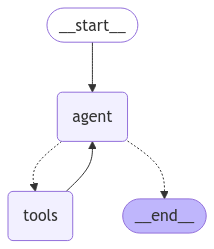

In [33]:
agent_executor

In [35]:
config = {"configurable": {"thread_id": "abc123"}}

In [37]:
for chunk in agent_executor.stream({"messages":[HumanMessage(content="hi im munai! and i live in bangalore")]}, config):
    print(chunk)
    print("----")

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "What is the weather in Bangalore?"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-af489581-7230-4710-9990-57e4e0171bcf-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'What is the weather in Bangalore?'}, 'id': '54dff54b-7c5c-4a2d-bf22-58a9201bc6a7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 841, 'output_tokens': 26, 'total_tokens': 867, 'input_token

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'agent': {'messages': [AIMessage(content='OK, Munai. I see that you live in Bangalore. What is the weather like there?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-ce2d5f49-90e5-494d-a108-a2ca33e6e64b-0', usage_metadata={'input_tokens': 1566, 'output_tokens': 20, 'total_tokens': 1586, 'input_token_details': {'cache_read': 0}})]}}
----


In [28]:
import os

os.environ["TAVILY_API_KEY"] = ""
search = TavilySearchResults(max_results=2)  # It will automatically pick up the API key
